In [1]:
from random import shuffle

import pandas as pd
import torch, torchvision
import json
import os

In [ ]:
import zipfile
import os

zip_path = 'data/flower_data.zip'
extract_to = 'data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [45]:
DATASET_PATH = 'data/images'

with open('data/cat_to_name.json', 'r') as f:
    CATEGORY_NAMES = json.load(f)

In [46]:
# Dataset does not implement (in standard definition) batching, shuffling, multiprocessing etc. All these are easier with DataLoaders

class OxfordFlowers(torch.utils.data.Dataset):
    def __init__(self, data_path, split='train', transform=None):
        self.__data_path = data_path
        self.__split = split
        self.img_and_labels = self.__create_labels()    # (image, label) list of tuples
        self.transform = transform

    # Create a list of tuples (image, label) from file
    def __create_labels(self):
        split_folder = os.path.join(self.__data_path, self.__split)   # 'data/images/train' etc.
        labels = sorted(os.listdir(split_folder))
        label_to_idx = {name: idx for idx, name in enumerate(labels)}   # {"1":0, "2":1...}

        img_and_labels = []
        for label in labels:
            label_folder = os.path.join(split_folder, label)
            for file in os.listdir(label_folder):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    filename = os.path.join(label_folder, file)
                    img_and_labels.append((filename,label_to_idx[label]))
        return img_and_labels

    def __len__(self):
        return len(self.img_and_labels)

    def __getitem__(self, idx):
        filename, label = self.img_and_labels[idx]
        image = torchvision.io.read_image(filename).float()/255.0   # Convert from PyTorch int [0,255] to float [0,1] because Normalize() expects this
        if self.transform:
            image = self.transform(image)
        return image, label


In [47]:
transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.Normalize(mean=0.5, std=0.5)
    ])

training_data = OxfordFlowers(DATASET_PATH, split='train', transform=transforms)
valid_data = OxfordFlowers(DATASET_PATH, split='valid', transform=transforms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9755855..0.7951219].


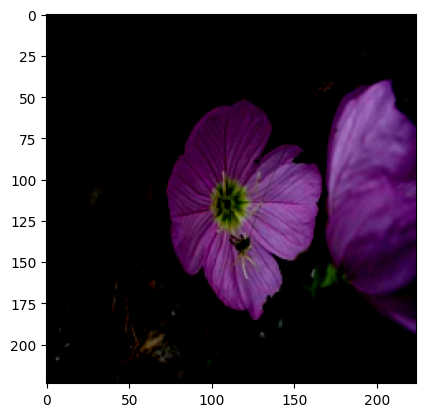

In [48]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0][0].permute(1, 2, 0).numpy())

In [49]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True)

In [50]:
train_features, train_labels = next(iter(train_loader))
train_features, train_labels

(tensor([[[[ 0.6229,  0.6419,  0.6056,  ...,  0.2568,  0.3867,  0.5310],
           [ 0.5778,  0.6526,  0.5887,  ...,  0.3161,  0.1830,  0.1546],
           [ 0.6074,  0.6565,  0.5477,  ..., -0.0752, -0.2305, -0.2426],
           ...,
           [-0.6338, -0.6312, -0.5885,  ..., -0.4183, -0.4111, -0.4059],
           [-0.6402, -0.6286, -0.5853,  ..., -0.4068, -0.3866, -0.3746],
           [-0.6306, -0.6371, -0.6086,  ..., -0.4041, -0.3677, -0.3305]],
 
          [[ 0.3534,  0.3067,  0.2080,  ...,  0.1786,  0.2931,  0.3681],
           [ 0.2992,  0.3143,  0.1828,  ...,  0.3423,  0.1908,  0.1418],
           [ 0.3083,  0.3116,  0.1422,  ...,  0.0057, -0.1800, -0.1350],
           ...,
           [-0.6654, -0.6628, -0.6201,  ..., -0.0974, -0.0937, -0.0899],
           [-0.6776, -0.6660, -0.6227,  ..., -0.1021, -0.1079, -0.1169],
           [-0.6698, -0.6764, -0.6478,  ..., -0.1069, -0.1066, -0.1023]],
 
          [[-0.8002, -0.8886, -0.8683,  ..., -0.4333, -0.2707, -0.1014],
           [-

In [51]:
train_features.shape, train_labels.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [52]:
img = train_features[0].squeeze()   # Removes all dimensions with size 1
img.shape

torch.Size([3, 224, 224])

In [53]:
a = [3,4,5]
a.extend([])
a

[3, 4, 5]

In [2]:
from oxford import preprocessing
training_dataloader = preprocessing.create_dataloader('train', batch_size=64, shuffle=True)
valid_dataloader = preprocessing.create_dataloader('valid', batch_size=64, shuffle=True)

In [55]:
train_features, train_labels = next(iter(training_dataloader))
train_features, train_labels

(tensor([[[[-3.2453e-01, -3.2445e-01, -3.0919e-01,  ..., -6.1677e-01,
            -6.2073e-01, -6.4193e-01],
           [-3.3805e-01, -3.1827e-01, -2.9016e-01,  ..., -6.1677e-01,
            -6.2073e-01, -6.4193e-01],
           [-3.3645e-01, -3.1310e-01, -2.9292e-01,  ..., -6.1677e-01,
            -6.2073e-01, -6.4193e-01],
           ...,
           [-4.9954e-01, -3.7505e-01, -1.6063e-01,  ..., -2.9340e-01,
            -3.2668e-01, -3.4902e-01],
           [-4.6942e-01, -3.5211e-01, -9.8696e-02,  ..., -2.9292e-01,
            -3.1900e-01, -3.4992e-01],
           [-4.5528e-01, -3.3900e-01, -9.7997e-02,  ..., -2.9284e-01,
            -3.1795e-01, -3.5211e-01]],
 
          [[-4.6405e-02, -4.2097e-02, -2.5841e-02,  ..., -3.3447e-01,
            -3.7150e-01, -4.2170e-01],
           [-5.8949e-02, -3.5919e-02, -7.3911e-03,  ..., -3.3447e-01,
            -3.7150e-01, -4.2170e-01],
           [-5.4226e-02, -3.0746e-02, -1.0562e-02,  ..., -3.3447e-01,
            -3.7150e-01, -4.2170e-01],


In [56]:
train_features.shape

torch.Size([64, 3, 224, 224])

## Building the Model

In [3]:
device = torch.accelerator.current_accelerator().type
device

'cuda'

In [5]:
class BaseLine(torch.nn.Module):
    def __init__(self, n_layers = 2 ,activation = torch.nn.ReLU()):
        super().__init__()
        self.flatten = torch.nn.Flatten(start_dim=1)
        print(self.flatten)
        self.activation = activation
        self.n_layers = n_layers
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(3*224*224, 512),
            self.activation,
            *[torch.nn.Linear(512, 512), self.activation]*self.n_layers,
            torch.nn.Linear(512,100)
        )
        print(self.linear_relu_stack)

    def forward(self, x):
        x = self.flatten(x) # Flattens the second dimension (dim=1), leaves dim=0 intact
        logits = self.linear_relu_stack(x)  # Returns unnormalized [-infty, infty] outputs of the final layer
        return logits

In [24]:
batch_1 = next(iter(training_dataloader))
image_1, label_1 = batch_1[0][0], batch_1[1][0].item()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0000002].


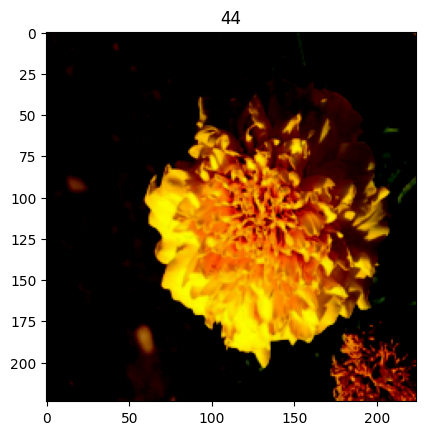

In [25]:
import matplotlib.pyplot as plt
plt.imshow(image_1.permute(1,2,0))
plt.title(label_1)
plt.show()

In [26]:
image_1.shape

torch.Size([3, 224, 224])

In [ ]:
model = BaseLine(3)
logits = model(image_1)     # The model is designed for batch instead of a single image, will err

In [ ]:
pred_probas = torch.nn.Softmax()(logits)
pred_probas.shape

In [ ]:
torch.argmax(pred_probas)

In [12]:
from oxford import training

model = training.BaseLine()
model = model.to(device)

Flatten(start_dim=1, end_dim=-1)
Sequential(
  (0): Linear(in_features=150528, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=102, bias=True)
)


## AutoDiff

In [29]:
x = torch.ones(5)
x

tensor([1., 1., 1., 1., 1.])

In [31]:
y = torch.zeros(3)
y

tensor([0., 0., 0.])

In [35]:
w = torch.randn(5,3, requires_grad=True)    # Standard Normal dist with shape [5,3], To get a Normal dist, you use w*std+mean manually.
w

tensor([[-0.4113,  1.0563, -0.7838],
        [-1.1370, -0.8066, -0.4811],
        [ 0.1120,  0.1566, -0.1318],
        [-0.5988,  0.3858,  0.1602],
        [ 1.6037,  1.3514, -0.3553]], requires_grad=True)

In [36]:
b = torch.randn(3, requires_grad=True)      # can also do `b.requires_grad=True` later
b

tensor([0.6551, 2.2866, 1.3301], requires_grad=True)

In [37]:
z = torch.matmul(x, w)+b  # x@w + b
z

tensor([ 0.2236,  4.4302, -0.2616], grad_fn=<AddBackward0>)

In [38]:
x@w + b ==z

tensor([True, True, True])

In [39]:
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
loss

tensor(1.9414, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [41]:
z.grad_fn, loss.grad_fn

(<AddBackward0 at 0x7f45840e3190>,
 <BinaryCrossEntropyWithLogitsBackward0 at 0x7f4584d3b670>)

In [42]:
loss.backward()     # Computes grads of loss wrt all (and only) `requires_grad=True` variables on the graph, i.e., w and b
w.grad, b.grad

(tensor([[0.1852, 0.3294, 0.1450],
         [0.1852, 0.3294, 0.1450],
         [0.1852, 0.3294, 0.1450],
         [0.1852, 0.3294, 0.1450],
         [0.1852, 0.3294, 0.1450]]),
 tensor([0.1852, 0.3294, 0.1450]))

In [ ]:
loss.backward(retain_graph=True)    # advised to only compute grads using `.backward()` once, for performance reasons. But if need it more than once, set `retain_graph=True`.

In [43]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():       # grads won't be computed for anything inside this block (for example when we dont need them anymore, like after training  we only need forward pass and computing grads would waste time, or to mark some params as frozen during training etc.)
    z = torch.matmul(x, w)+b
print(z.requires_grad)


True
False


In [44]:
z = torch.matmul(x, w)+b
z_det = z.detach()       # does the same as above to z
print(z_det.requires_grad)

False


Graphs in PyTorch are dynamic, unlike Tensorflow. After each `.backward()` call, a new graph is recreated from scratch. You can change the shape, size, and operations at every iteration.

## Optimization

In [63]:
next(iter(model.parameters())).shape

torch.Size([512, 150528])

In [13]:
learning_rate = 4e-2
batch_size = 64
epochs = 15

In [14]:
loss_fn = torch.nn.CrossEntropyLoss()  # takes logits and outputs the target is class indices
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [15]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
       X, y = X.to(device), y.to(device)
       # print("y.shape:", y.shape)
       # print("y.min():", y.min().item(), " y.max():", y.max().item())
       # print("y dtype:", y.dtype)
       # Forward prop
       y_pred = model(X)
       loss = loss_fn(y_pred, y)
        # Backprop
       loss.backward()
       optimizer.step()
       optimizer.zero_grad()

       loss = loss.item()
       if batch >= len(dataloader):
           print(f'Batch: {batch} \t Loss: {loss}\n')

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    model.eval()
    test_loss = 0
    accuracy = 0
    with torch.no_grad():   # during testing, we don't wanna waste time and memory computing grads
        for batch, (X,y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item() # loss is tensor, need to extract the item for +=
            accuracy += (y_pred.argmax(1)==y).type(torch.float).sum().item()
        test_loss /= size
        accuracy /= size
        print(f'Test Accuracy: {accuracy}\n')

In [16]:
from oxford import training
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    training.train_loop(training_dataloader, model, loss_fn, optimizer)
    training.test_loop(valid_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Test Accuracy: 0.035452322738386305

Epoch 2
-------------------------------
Test Accuracy: 0.13691931540342298

Epoch 3
-------------------------------
Test Accuracy: 0.15036674816625917

Epoch 4
-------------------------------
Test Accuracy: 0.23838630806845965

Epoch 5
-------------------------------
Test Accuracy: 0.17359413202933985

Epoch 6
-------------------------------
Test Accuracy: 0.21638141809290953

Epoch 7
-------------------------------
Test Accuracy: 0.2200488997555012

Epoch 8
-------------------------------
Test Accuracy: 0.17481662591687042

Epoch 9
-------------------------------
Test Accuracy: 0.30684596577017115

Epoch 10
-------------------------------
Test Accuracy: 0.28361858190709044

Epoch 11
-------------------------------
Test Accuracy: 0.25794621026894865

Epoch 12
-------------------------------
Test Accuracy: 0.27506112469437655

Epoch 13
-------------------------------
Test Accuracy: 0.24938875305623473

Epoch 14

#### Run II

In [23]:
len(training_dataloader.dataset)

6552

In [20]:
learning_rate = 4e-4
batch_size = 64
epochs = 20

loss_fn = torch.nn.CrossEntropyLoss()  # takes logits and outputs the target is class indices
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
for t in range(epochs):
    print(f"--Second Run---\nEpoch {t+1}\n-------------------------------")
    training.train_loop(training_dataloader, model, loss_fn, optimizer)
    training.test_loop(valid_dataloader, model, loss_fn)
print("Done!")